[[-0.99949765 -0.02587626  0.01829954]
 [ 0.02988376 -0.96176534  0.27223959]
 [ 0.01055532  0.27264969  0.96205547]]
[-0.00038707  0.10318894 -0.01401102]


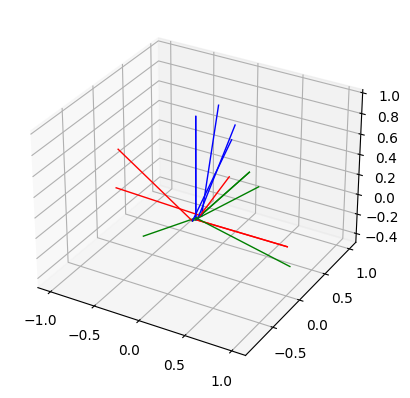

In [2]:
import matplotlib.pyplot as plt
import numpy as np



def plot_3d_line(ax, p1, p2, color=None, linestyle='-', linewidth=1.0):
    if color is None:
        color = np.random.rand(3)
    ax.plot([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]], linestyle=linestyle, linewidth=linewidth, color=color)
    
# plot line [0,0,0] -> [1,0,0] in red
# plot line [0,0,0] -> [0,1,0] in green
# plot line [0,0,0] -> [0,0,1] in blue

def plot_axis(ax,Rwc,twc):
    # plot line [0,0,0] -> [1,0,0] in red
    # plot line [0,0,0] -> [0,1,0] in green
    # plot line [0,0,0] -> [0,0,1] in blue
    plot_3d_line(ax, twc, twc+Rwc[:,0], color='r')
    plot_3d_line(ax, twc, twc+Rwc[:,1], color='g')
    plot_3d_line(ax, twc, twc+Rwc[:,2], color='b')
    
    

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

vr_camera1_Rbc1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
vr_camera1_tbc1 = np.array([0, 0, 0])

plot_axis(ax, vr_camera1_Rbc1, vr_camera1_tbc1)

vr_camera2_Rbc2 = np.array([[-0.99949765, -0.025876258, 0.018299539], [0.029883759, -0.96176534, 0.27223959], [0.010555321, 0.27264969, 0.96205547]])
vr_camera2_tbc2 = np.array([-0.00038707237, 0.10318894, -0.01401102])

vr_camera3_Rbc3 = np.array([[0.5687224, 0.81622218, -0.10166702], [-0.3726157, 0.36585493, 0.85282338], [0.73328874, -0.44713703, 0.51220709]])
vr_camera3_tbc3 = np.array([-0.0056250621, 0.041670205, -0.013388009]) 


vr_camera4_Rbc4 = np.array([[-0.59714752, 0.79234879, -0.12489289], [-0.35174627, -0.11873178, 0.92853504], [0.72089486, 0.598403, 0.34960612]])
vr_camera4_tbc4 = np.array([-0.079096205, 0.064828795, -0.066688745]) 

print(vr_camera2_Rbc2)
print(vr_camera2_tbc2)

plot_axis(ax, vr_camera1_Rbc1, vr_camera1_tbc1)
plot_axis(ax, vr_camera2_Rbc2, vr_camera2_tbc2)
plot_axis(ax, vr_camera3_Rbc3, vr_camera3_tbc3)
plot_axis(ax, vr_camera4_Rbc4, vr_camera4_tbc4)

plt.show()





[[-0.99948872  0.03134566 -0.00630414]
 [-0.03194935 -0.97150206  0.23486803]
 [ 0.00123761  0.23494937  0.97200682]]
[[ 0.00300662]
 [ 0.11799675]
 [-0.00766478]]
[[-0.99949765 -0.02587626  0.01829954]
 [ 0.02988376 -0.96176534  0.27223959]
 [ 0.01055532  0.27264969  0.96205547]]
[-0.00038707  0.10318894 -0.01401102]


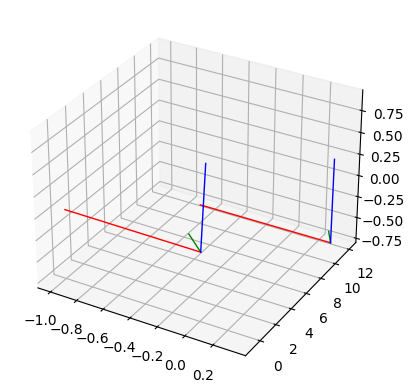

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

def plot_3d_line(ax, p1, p2, color=None, linestyle='-', linewidth=1.0):
    if color is None:
        color = np.random.rand(3)
    ax.plot([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]], linestyle=linestyle, linewidth=linewidth, color=color)
    
# plot line [0,0,0] -> [1,0,0] in red
# plot line [0,0,0] -> [0,1,0] in green
# plot line [0,0,0] -> [0,0,1] in blue

def plot_axis(ax,Rwc,twc):
    # plot line [0,0,0] -> [1,0,0] in red
    # plot line [0,0,0] -> [0,1,0] in green
    # plot line [0,0,0] -> [0,0,1] in blue
    plot_3d_line(ax, twc, twc+Rwc[:,0], color='r')
    plot_3d_line(ax, twc, twc+Rwc[:,1], color='g')
    plot_3d_line(ax, twc, twc+Rwc[:,2], color='b')
    
    

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# camera left rvec:  [[-1.31788384]
#  [ 2.68046011]
#  [-0.49458597]]
# camera left tvec:  [[0.20409433]
#  [0.11933755]
#  [0.32909857]]

# camera right rvec:  [[-2.73979355]
#  [-1.24537182]
#  [ 0.31599045]]
# camera right tvec:  [[-0.20061096]
#  [ 0.08412297]
#  [ 0.3263835 ]]

left_rvec = np.array([[-1.31788384], [2.68046011], [-0.49458597]])
left_tcw = np.array([[0.20409433], [0.11933755], [0.32909857]])

right_rvec = np.array([[-2.73979355], [-1.24537182], [0.31599045]])
right_tcw = np.array([[-0.20061096], [0.08412297], [0.3263835]])

left_Rcw, _ = cv2.Rodrigues(left_rvec)
right_Rcw, _ = cv2.Rodrigues(right_rvec)


left_Rwc = left_Rcw.T
left_twc = -np.dot(left_Rwc, left_tcw)
# print(left_Rwc)
# print(left_twc)

right_Rwc = right_Rcw.T
right_twc = -np.dot(right_Rwc, right_tcw)

Rlr = np.dot(left_Rwc.T, right_Rwc)
tlr = np.dot(left_Rwc.T, right_twc - left_twc)

print(Rlr)
print(tlr)

plot_axis(ax, Rlr, tlr.T[0]*100)

# plot_axis(ax, right_R, right_tvec.T[0])


vr_camera2_Rbc2 = np.array([[-0.99949765, -0.025876258, 0.018299539], [0.029883759, -0.96176534, 0.27223959], [0.010555321, 0.27264969, 0.96205547]])
vr_camera2_tbc2 = np.array([-0.00038707237, 0.10318894, -0.01401102])

print(vr_camera2_Rbc2)
print(vr_camera2_tbc2)
plot_axis(ax, vr_camera2_Rbc2, vr_camera2_tbc2)




In [7]:
import cv2
import numpy as np
from PIL import Image
def distortPoints(undistortedPoints, k, d):
    
    undistorted = np.float32(undistortedPoints[:, np.newaxis, :])

    kInv = np.linalg.inv(k)

    for i in range(len(undistorted)):
        srcv = np.array([undistorted[i][0][0], undistorted[i][0][1], 1])
        dstv = kInv.dot(srcv)
        undistorted[i][0][0] = dstv[0]
        undistorted[i][0][1] = dstv[1]

    distorted = cv2.fisheye.distortPoints(undistorted, k, d)
    return distorted  

vr_camera1_K = np.array([[276.28156, 0, 317.99796], [0, 276.28156, 240.97645], [0, 0, 1]])
vr_camera1_D = np.array([-0.013057856, 0.026553879, -0.01489986, 0.0031719355])
left_image_corners_undistorted = np.zeros((0, 2))
left_tag_ids = []
result_output_file_left = "finded_tag_indexs_left.txt"
with open(result_output_file_left, 'r') as f:  #打开文件
    lines = f.readlines() #读取所有行
    for line in lines:
        if line.strip() == '':
            continue
        # 获取id和坐标
        parts = line.split()
        tag_id = int(parts[0])
        coordinates = [float(x.strip('[],')) for x in parts[1:]]
        cornersImage = np.array(coordinates).reshape((4, 2))
        left_image_corners_undistorted = np.vstack((left_image_corners_undistorted, cornersImage))
        left_tag_ids.append(tag_id)
        print(f'Left Tag ID: {tag_id}, Coordinates: {coordinates}')
        
image_file = "4252229514797.pgm"
img = Image.open(image_file)
np_img = np.array(img)

left_image_corners_distorted = distortPoints(left_image_corners_undistorted, vr_camera1_K, vr_camera1_D)

for i in range(len(left_image_corners_distorted)):
    cv2.circle(np_img, (int(left_image_corners_distorted[i][0][0]), int(left_image_corners_distorted[i][0][1])), 2, (0, 255, 0), 2)

cv2.imwrite("distorted.png", np_img)




Left Tag ID: 1, Coordinates: [478.789246, 291.485626, 434.716278, 234.47345, 386.55307, 278.606476, 434.396027, 341.293182]
Left Tag ID: 2, Coordinates: [425.775024, 222.907516, 382.211731, 166.33197, 329.295837, 204.268005, 376.658264, 266.460907]
Left Tag ID: 3, Coordinates: [373.403778, 154.879974, 329.807343, 98.598305, 272.391937, 130.292709, 319.736816, 191.656952]
Left Tag ID: 4, Coordinates: [321.045929, 87.095482, 277.853027, 31.499411, 216.191177, 57.055111, 263.195282, 117.823814]
Left Tag ID: 6, Coordinates: [483.055542, 428.802948, 434.487946, 365.091156, 380.179932, 428.334808, 433.909668, 499.274445]
Left Tag ID: 7, Coordinates: [424.622559, 352.238953, 375.675629, 288.658295, 315.571136, 343.750854, 369.278687, 414.104614]
Left Tag ID: 8, Coordinates: [365.973846, 275.627899, 317.521881, 212.641983, 251.615616, 260.228912, 304.687622, 329.774231]
Left Tag ID: 9, Coordinates: [307.762054, 200.218292, 259.775177, 137.381348, 188.46402, 176.945557, 240.821411, 246.198059]


True